In [2]:
import torch
from model import EdgePredictorGNN
from prepare_data import train_loader, val_loader

Created 390012 Data objects, each with 6 nodes, node feature shape torch.Size([6, 2]), and 9 edges.
Train samples: 312009, Validation samples: 78003


In [3]:
for batch in train_loader:
    data = batch
    break
data.edge_attr

tensor([[-0.3434],
        [ 0.2277],
        [ 0.9213],
        [ 0.5188],
        [-0.6466],
        [-0.5264],
        [-0.4963],
        [ 0.4857],
        [-1.7770],
        [ 0.8172],
        [-0.9395],
        [-1.7381],
        [-1.3768],
        [-0.5188],
        [-1.2457],
        [ 0.2367],
        [-1.4872],
        [-0.9082],
        [ 1.0997],
        [ 1.8930],
        [ 0.8840],
        [ 0.9527],
        [-1.2511],
        [ 0.9962],
        [ 0.9956],
        [-1.4690],
        [ 0.3333],
        [ 1.4004],
        [ 1.4546],
        [ 1.0853],
        [-1.2999],
        [-0.7707],
        [-0.7830],
        [ 0.5309],
        [-1.4194],
        [ 1.2245],
        [-0.3463],
        [-1.0849],
        [-1.5592],
        [-0.9600],
        [-0.5362],
        [ 0.8146],
        [ 0.8006],
        [-0.1996],
        [-1.4956],
        [ 1.7228],
        [ 0.9592],
        [-1.0683],
        [ 0.8751],
        [ 0.2433],
        [ 0.2896],
        [-0.9842],
        [-0.

Evaluating model...
Train set: MSE = 0.619878
Validation set: MSE = 0.620989


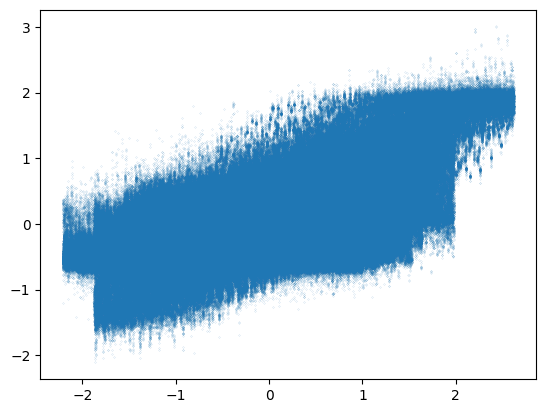

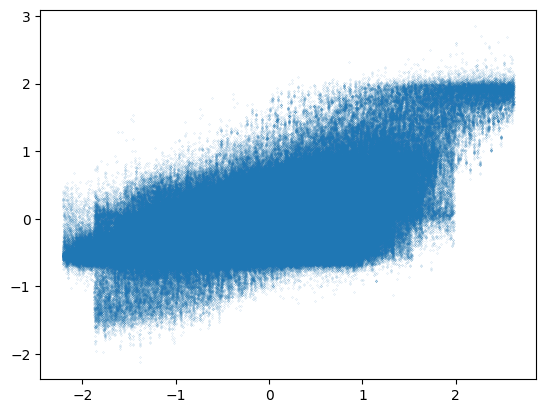

In [7]:
best_model = 6  # Change this to load a different epoch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_channels = 2
hidden_channels = 32
edge_out_channels = 1

# Load model
model = EdgePredictorGNN(in_channels, hidden_channels, edge_out_channels).to(device)
model.load_state_dict(torch.load(f"model_epoch_{best_model}.pt", map_location=device))
model.eval()

def predict(loader, name):
	all_preds = []
	all_targets = []
	with torch.no_grad():
		for batch in loader:
			batch = batch.to(device)
			pred = model(batch)
			all_preds.append(pred.cpu())
			all_targets.append(batch.edge_attr.cpu())
	preds = torch.cat(all_preds, dim=0)
	targets = torch.cat(all_targets, dim=0)
	mse = torch.mean((preds - targets) ** 2).item()
	print(f"{name} set: MSE = {mse:.6f}")
	return preds, targets

print("Evaluating model...")
train_preds, train_targets = predict(train_loader, "Train")
val_preds, val_targets = predict(val_loader, "Validation")

import matplotlib.pyplot as plt

plt.scatter(train_targets[:,0], train_preds[:,0], s=0.005)
plt.show()

plt.scatter(val_targets[:,0], val_preds[:,0], s=0.005)
plt.show()